<a href="https://colab.research.google.com/github/SMAHAM/Scene-Recognization/blob/master/scene_reorganization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multimodal scene reorganization for audio Categorization

## Stats

### Number of classes = 10


```
class_labels=[
'air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music'
]
```


### Number of files in total


```
   1302 json
   1302 csv
    925 wav
    181 mp3
    106 flac
     58 aif
     28 aiff
      4 ogg
```

---

### air_conditioner

```
     64 json
     64 csv
     39 wav
     12 flac
     10 mp3
     2 aif
     1 aiff
```

---
### car_horn

```
    125 json
    125 csv
    104 wav
     11 mp3
      4 flac
      3 aiff
      2 aif
      1 ogg
```

---
### children_playing
```
    158 json
    158 csv
    121 wav
     16 mp3
      9 aif
      6 flac
      5 aiff
      1 ogg
```
---
### dog_bark

```
    337 json
    337 csv
    221 wav
     54 mp3
     37 flac
     16 aif
      8 aiff
      1 ogg
```
---
### drilling
```
    119 json
    119 csv
     88 wav
     12 flac
     11 mp3
      5 aiff
      3 aif
```
---
### engine_idling
```
     97 json
     97 csv
     67 wav
     10 mp3
      9 flac
      9 aif
      2 aiff
```
---
### gun_shot
```
    117 json
    117 csv
     94 wav
     17 mp3
      4 flac
      2 aif
```
---
### jackhammer
```
     45 json
     45 csv
     31 wav
      7 flac
      4 aif
      2 mp3
      1 aiff
```
---
### siren
```
     74 json
     74 csv
     60 wav
      7 aif
      5 mp3
      1 ogg
      1 flac
```
---
### street_music
```
    166 json
    166 csv
    100 wav
     45 mp3
     14 flac
      4 aif
      3 aiff
 ```

In [0]:
#to find stats
#!find ./ -type f | rev | cut -d. -f1 | rev  | tr '[:upper:]' '[:lower:]' | sort | uniq --count | sort -rn
#number of files in a directory
#ls -q | wc -l

In [0]:
#list of labels
class_labels=[
'air_conditioner',
'car_horn',
'children_playing',
'dog_bark',
'drilling',
'engine_idling',
'gun_shot',
'jackhammer',
'siren',
'street_music'
]

# Installation of required librearies

In [9]:
#apt install axel
!pip3 install librosa
!pip install download

# Import Libraries

In [0]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import pandas as pd
from PIL import Image
%matplotlib inline
# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from download import download

In [0]:
#connecting to drive
#from google.colab import drive
#drive.mount('/content/gdrive')
#Store the sampling rate as `sr`
#sr = 44100
# ---Set the hop length; at 22050 Hz, 512 samples ~= 23ms
#hop_length = 512

# File downloader

In [14]:
#whole dataset
#!axel -n 10 https://zenodo.org/record/1206938/files/UrbanSound.tar.gz

url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/air_conditioner/13230.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/car_horn/2937.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/children_playing/13579.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/dog_bark/344.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/drilling/518.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/engine_idling/6988.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/gun_shot/7060.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/jackhammer/24728.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/siren/16772.wav'
download(url,'./'+url.rsplit('/', 1)[-1])
url = 'https://github.com/SMAHAM/Scene-Recognization/blob/master/UrbanSound_data/street_music/6508.mp3'
download(url,'./'+url.rsplit('/', 1)[-1])

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.
Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./6508.mp3'

## Converting second intervals to bit intervals

In [0]:
def start_end(sig,start,end,sr=44100):
  if (start>end):
    (start,end)=(end,start)
  if (start<=0 or start>len(sig)/sr):
    start = 0
  else:
    start = int(start*sr)
  if (end==-1 or end>len(sig)/sr):
    end = len(sig)
  else:
    end = int(end*sr)
  print('start: ',start)
  print('end: ',end)
  return(start,end)

# MFCC generator

In [0]:
def make_mfcc(filename,file_ext,path='./',start=-1,end=-1,fig_size =5,sr=44100,hop_length=512,n_mfcc = 13):
  fig = plt.Figure(figsize=(fig_size,fig_size))
  canvas = FigureCanvas(fig)
  ax = fig.add_subplot(111)
  ax.axis('off')
  sig, rate = librosa.load(path+filename+file_ext, sr=sr)
  start,end = start_end(sig,start,end)
  y=sig[start:end]
  
  mfcc = librosa.feature.mfcc(y=y, sr=rate, hop_length=hop_length, n_mfcc=n_mfcc)
  mfcc_result = librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, ax=ax)
  img_name = filename+'_mfcc.png'
  fig.savefig(path+img_name)
  img = Image.open(path+img_name)
  rate = int(fig_size/5)
  left = rate*50
  right = left + 256 * rate
  crop_area = (left, left, right, right)
  cropped_img = img.crop(crop_area)
  plt.axis('off')
  imgplot = plt.imshow(cropped_img)
  cropped_img.save(path+img_name)
  print('The length of main signal is ',round(len(sig)/sr,4),' seconds')
  print('The MFCC file is created: '+img_name)
  print('The size of main signal is: ',len(sig))
  print('The size of extracted signal is: ',len(y))

# STFT generator

In [0]:
def make_stft(filename,file_ext,path='./',start=-1,end=-1,fig_size =5,sr=44100,hop_length=512,window_size = 1024):
  fig = plt.Figure(figsize=(fig_size,fig_size))
  canvas = FigureCanvas(fig)
  ax = fig.add_subplot(111)
  ax.axis('off')
  sig, rate = librosa.load(path+filename+file_ext, sr=sr)
  start,end = start_end(sig,start,end)
  y=sig[start:end]
  window = np.hanning(window_size)
  stft  = librosa.core.spectrum.stft(y=y, n_fft=window_size, hop_length=hop_length, window=window)
  out = 2 * np.abs(stft) / np.sum(window)

  stft = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
  img_name = filename+'_stft.png'
  fig.savefig(path+img_name)
  img = Image.open(path+img_name)
  rate = int(fig_size/5)
  left = rate*50
  right = left + 256 * rate
  crop_area = (left, left, right, right)
  cropped_img = img.crop(crop_area)
  plt.axis('off')
  imgplot = plt.imshow(cropped_img)
  cropped_img.save(path+img_name)
  print('The length of main signal is ',round(len(sig)/sr,4),' seconds')
  print('The STFT file is created: '+img_name)
  print('The size of main signal is: ',len(sig))
  print('The size of extracted signal is: ',len(y))

# Air Conditioner 

## MFCC

start:  93103
end:  181303
The length of main signal is  61.2833  seconds
The MFCC file is created: 13230_mfcc.png
The size of main signal is:  2702592
The size of extracted signal is:  88200


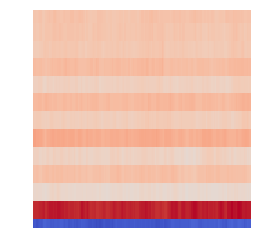

In [24]:
make_mfcc('13230','.mp3', fig_size = 5, start=2.1112, end=4.1112, path='/content/')

## STFT

start:  93103
end:  181303
The length of main signal is  61.2833  seconds
The STFT file is created: 13230_stft.png
The size of main signal is:  2702592
The size of extracted signal is:  88200


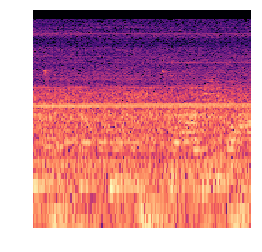

In [19]:
make_stft('13230','.mp3', fig_size = 5, start=2.1112, end=4.1112, path='/content/')

# Car Horn

## MFCC

start:  0
end:  36128
The length of main signal is  0.8192  seconds
The MFCC file is created: 2937_mfcc.png
The size of main signal is:  36128
The size of extracted signal is:  36128


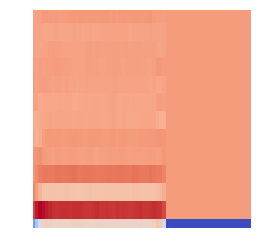

In [23]:
make_mfcc('2937','.wav', fig_size = 5, start=2.1112, end=4.1112, path='/content/')

## STFT

start:  0
end:  36128
The length of main signal is  0.8192  seconds
The STFT file is created: 2937_stft.png
The size of main signal is:  36128
The size of extracted signal is:  36128


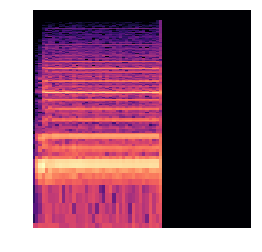

In [0]:
make_stft('2937','.wav', fig_size = 5, start=2.1112, end=4.1112, path='/content/')

# MNIST code

In [21]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step


W0619 21:45:45.424660 140358994655104 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2205 - acc: 0.9354
Epoch 2/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0976 - acc: 0.9704
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0694 - acc: 0.9781
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0543 - acc: 0.9824
Epoch 5/5
10000/10000 [==============================] - 0s 49us/sample - loss: 0.0666 - acc: 0.9796


[0.06660968478482682, 0.9796]

# Children Playing

MFCC

start:  93103
end:  181303
The length of main signal is  163.5527  seconds
The MFCC file is created: 13579_mfcc.png
The size of main signal is:  7212672
The size of extracted signal is:  88200


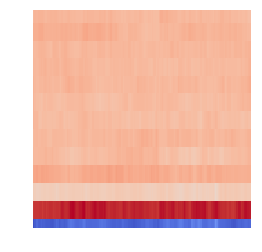

In [25]:
make_mfcc('13579','.mp3', fig_size = 5, start=2.1112, end=4.1112, path='/content/')

STFT

start:  93103
end:  181303
The length of main signal is  163.5527  seconds
The STFT file is created: 13579_stft.png
The size of main signal is:  7212672
The size of extracted signal is:  88200


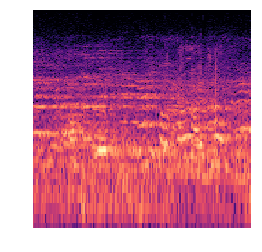

In [26]:
make_stft('13579','.mp3', fig_size = 5, start=2.1112, end=4.1112, path='/content/')